# Exploratory adaptation
## A quick example

In this notebook, we implement the exploratory adaptation algorithm. We start importing necessary libraries

In [37]:
%matplotlib notebook
import numpy as np
import expadap as ea
import matplotlib.pyplot as plt

Before running a simulation we need to generate a cell and an environment. Both are classes which are included in the expadap library. We start by generating the cell, which takes some time due to the network generation algorithm

In [32]:
MyCell = ea.cell(nettype='sf-bin',N=500,beta=1.8)

Generating degree sample
E1
E1
E4
E1
E1
E1
E1
Constructing topology


The cell class can take many different inputs, such as nettype (topology structure, scalefree, binomial, etc), N (network size), beta (exponent), saturation (sigmoidal or cubical). We can now see the network topology

<IPython.core.display.Javascript object>


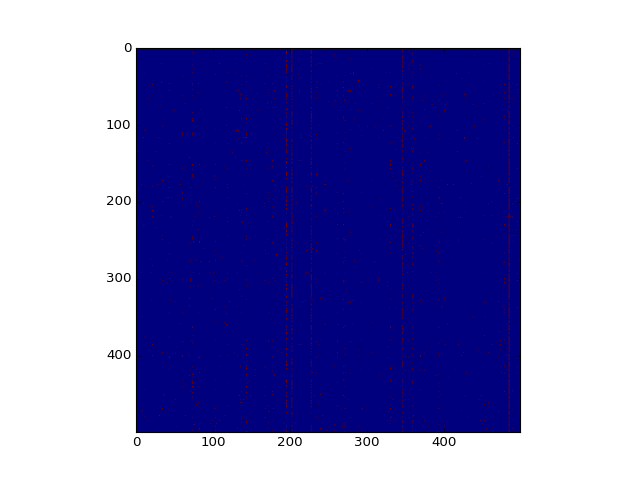

In [38]:
plt.imshow(MyCell.T)

The intial values of the interaction strengths $J_{ij}$ are stored in MyCell.J, and the connectivity matrix $\hat{W}$ is a sparse matrix stored in MyCell.W . Moving on, we can now generate the environment

In [39]:
MyEnvironment = ea.environment(stress='tanh',N=500)

The environment includes the trait vector $\vec{b}$, which we store in MyEnvironment.b . It also includes the attracting potential $\mathcal{M}(y)$. There are several types of such potentials, determined by the input stress (like tanh, or piecewise-constant). We can plot the potential.

<IPython.core.display.Javascript object>


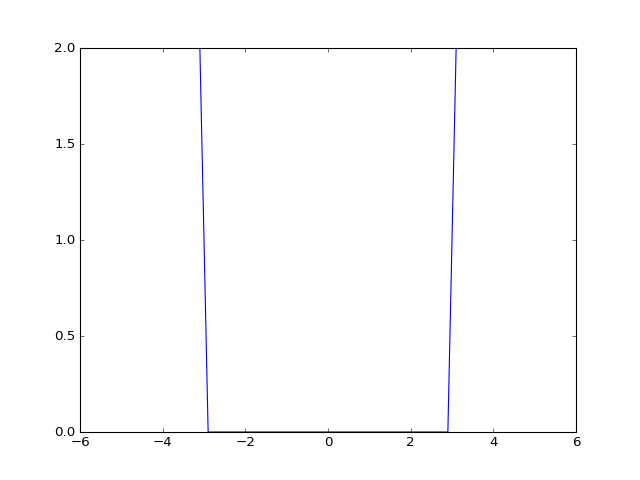

In [40]:
y=np.arange(-5.,5.,.1)
plt.plot(y,MyEnvironment.M(y));

To run a simulation we just generate an element of the simulation class, which takes as a input a cell and an environment. Note that separating cells and environments makes it easy to run many simulations that keep one or the other fixed.

In [41]:
MySimulation = ea.simulation(MyEnvironment,MyCell,T=1000)

There are several types of time-evolution algorithms (method input), although right now only two are implemented (naama and naama-noise). We can now run the simulation. It will generate an initial state save-file in the folder ./DATA/ where it stores the environment and cell classes. The outcome is stored every dT time steps (simulation input), and stored in MySimulation.savey, similarly for saveJ and savex. Eventually this should be stored in data-files.

In [42]:
MySimulation.run()

Initial state saved


We can now plot the outputs

<IPython.core.display.Javascript object>


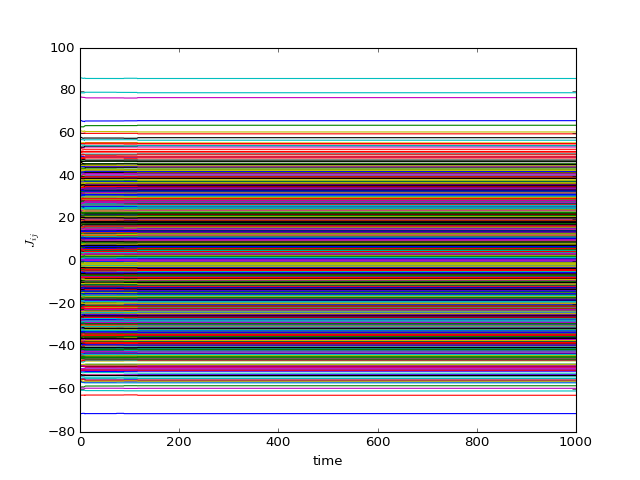

In [43]:
plt.plot(MySimulation.saveJ[:,:].transpose());
plt.ylabel('$J_{ij}$');plt.xlabel('time');

<IPython.core.display.Javascript object>


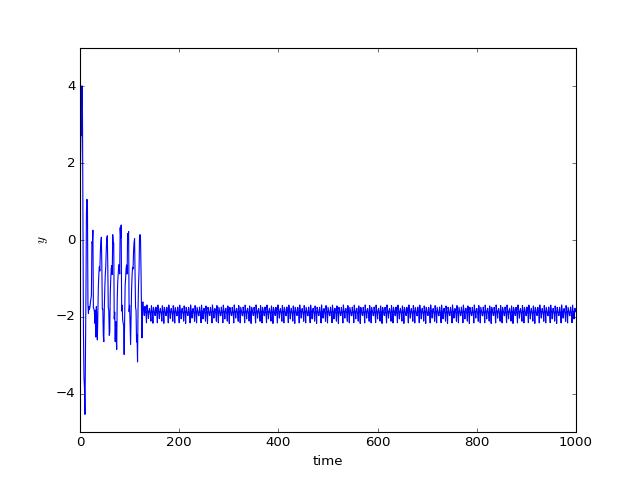

In [45]:
plt.plot(MySimulation.savey);
plt.ylabel('$y$');plt.xlabel('time');

<IPython.core.display.Javascript object>


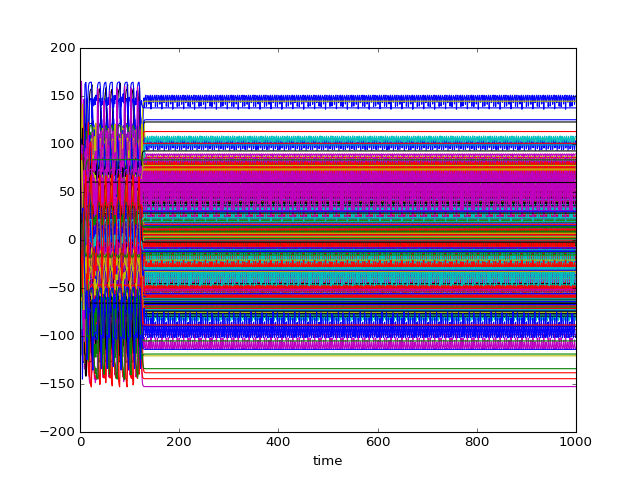

In [47]:
plt.plot(MySimulation.savex.transpose());
plt.ylabel('$\vec{x}$');plt.xlabel('time');